## **The Sparks Foundation - Internship**
GRIP Dec-20

### **Name: Ansh Mehta**

### Dataset on Scores and hours Studied

In [89]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [90]:
# Downloaded the Dataset and reading it
df=pd.read_csv('student_scores.csv')

In [91]:
# Printing the first 5 rows of data
df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [93]:
# Checking for null values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [94]:
# Getting the column Names for further reference
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [71]:
# Changing the Data-type of Hours column to float

df['Hours']=df['Hours'].astype(float)
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


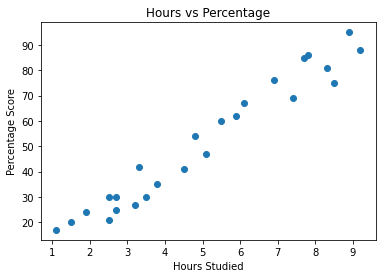

In [49]:
# Plotting the values (Score vs Hours)

plt.scatter(df['Hours'],df['Scores'])
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [56]:
# Deciding on the X and Y values which have to be trained

X=df.iloc[:,:-1].values
Y=df.iloc[:,1].values

In [77]:
# Splitting the data (85% training and 15% test)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15)

In [78]:
# Fitting the Data into the Linear regression Model

from sklearn.linear_model import LinearRegression  
regrsr = LinearRegression()
regrsr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

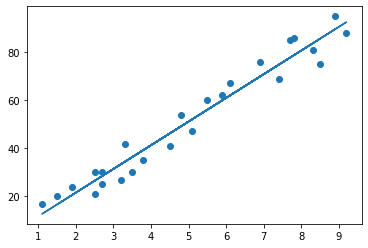

In [79]:
# Plotting the Linear Regression line along with the data points

lines = regrsr.coef_*X+regrsr.intercept_

# Plotting for the test data
plt.scatter(X, Y)
plt.plot(X, lines);
plt.show()

In [80]:
# Predicting the scores

Y_pred = regrsr.predict(X_test)

In [81]:
print(Y_pred)

[56.07371096 39.30659544 28.45728541 12.67647081]


In [82]:
# Predicting the scores when hours=9.25

hrs = np.array(9.25)
hrs=hrs.reshape(1,-1)
own_pred = regrsr.predict(hrs)
print("No of Hours = ",hrs)
print("Predicted Score = ",own_pred[0])

No of Hours =  [[9.25]]
Predicted Score =  93.0599951776838


In [88]:
#Evaluating the model using different errors

from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt

mse = mean_squared_error(Y_test, Y_pred)
rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print('Mean Squared Error:',mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', mean_absolute_error(Y_test, Y_pred))

Mean Squared Error: 13.758845742782217
Root Mean Squared Error: 3.7092918114893867
Mean Absolute Error: 3.5247820684027
